### Dealing with Categorical data
- machine learning model will not accept categorical values
- you mus to convert categories values into numeric values 
  - Not that category
  - That category

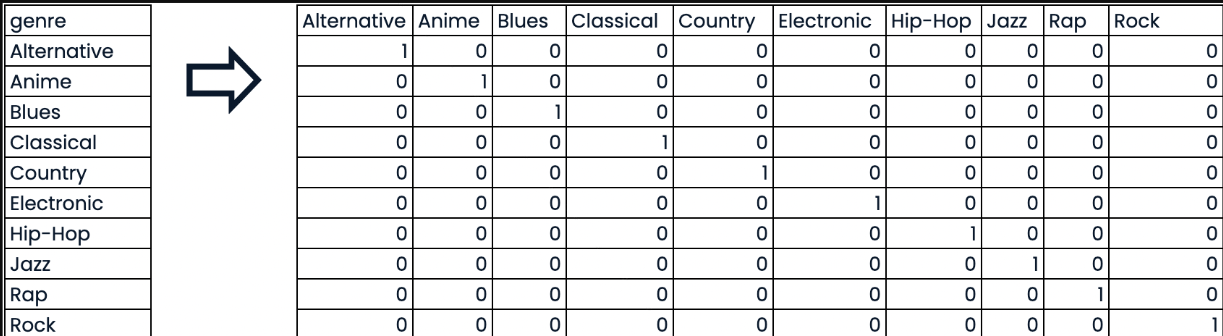

you can do this with
- scikit-learn: OneHotEncoder
- pandas      : get_dummies()
  - var = pd.get_dummies(df['column'], drop_first=True)
  - var = pd.concat([df, var], axis=1)
  - df.drop('column', axis=1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, r2_score

from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
music_df = pd.read_csv('../datasets/music.csv')
music_df = music_df.iloc[:, 1:]
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60,0.896000,0.726,214547,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,Jazz
1,63,0.003840,0.635,190448,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,Rap
2,59,0.000075,0.352,456320,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,Electronic
3,54,0.945000,0.488,352280,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,Rock
4,55,0.245000,0.667,273693,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,0.972000,0.193,208040,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,Rock
996,56,0.005790,0.939,144453,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,Electronic
997,54,0.016100,0.739,238339,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,Rap
998,62,0.326000,0.515,286707,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,Rock


#### `Creating dummy variables`
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The __music_df__ dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of __music_df__ plus dummy variables from the "___genre___" column.

- Use a relevant function, passing the entire __music_df__ DataFrame, to create __music_dummies__, dropping the first binary column.
- Print the shape of __music_dummies__.

In [3]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


As there were ten values in the "__genre__" column, nine new columns were added by a call of __pd.get_dummies()__ using __drop_first=True__. After dropping the original "__genre__" column, there are still eight new columns in the DataFrame!

#### `Regression with categorical features`
Now you have created __music_dummies__, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

__music_dummies__ has been preloaded for you, along with Ridge, __cross_val_score__, numpy as np, and a __KFold__ object stored as __kf__.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value— "__popularity__".

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

- Create ___X___, containing all features in __music_dummies__, and ___y___, consisting of the "__popularity__" column, respectively.
- Instantiate a _ridge regression model_, setting _alpha_ equal to ___0.2___.
- Perform _cross-validation_ on ___X___ and ___y___ using the _ridge model_, setting ___cv___ equal to ___kf___, and using _negative mean squared error_ as the scoring metric.
- Print the __RMSE__ values by converting negative scores to positive and taking the _square root_.

In [5]:
# Create X and y
X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

#  Instantiate a ridge model
ridge = Ridge(alpha=0.2)

#  Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

#  Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.574907518691898
Standard Deviation of the target array: 14.02156909907019


 An average __RMSE__ of approximately  is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

In [6]:
music_df['popularity'].max()

82

In [7]:
# # Langkah 1: Normalisasi
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Langkah 2: Mencoba Random Forest
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# scores = cross_val_score(rf_model, X_scaled, y, cv=kf,
#                          scoring='neg_mean_squared_error')
# rmse_rf = np.sqrt(-scores)
# print("Average RMSE (Random Forest): {}".format(np.mean(rmse_rf)))

# # Langkah 3: Hyperparameter tuning
# param_grid = {'alpha': [0.1, 0.2, 0.5, 1.0]}
# grid_search = GridSearchCV(
#     Ridge(), param_grid, scoring='neg_mean_squared_error', cv=kf)
# grid_search.fit(X_scaled, y)
# best_model = grid_search.best_estimator_
# print("Best alpha: {}".format(grid_search.best_params_))

# # Langkah 4: Analisis Residual
# residuals = y - best_model.predict(X_scaled)
# plt.scatter(y, residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('True Values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs True Values')
# plt.show()

#### `Dropping missing data`
Over the next three exercises, you are going to tidy the __music_df__ dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "__Rock__" genre.

In this exercise specifically, you will drop missing values accounting for less than ___5%___ of the dataset, and convert the "__genre__" column into a binary feature.

In [8]:
music_df = pd.read_excel('../datasets/music_df_dirty.xlsx')
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


- Print the number of missing values for each column in the __music_df__ dataset, sorted in ascending order.

In [9]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


- Remove values for all columns with 50 or fewer missing values.

In [10]:
# # Print missing values for each column
# print(music_df.isna().sum().sort_values())

# # Remove values where less than 5% are missing
# music_df = music_df.dropna(
#     subset=['genre', 'popularity', 'loudness', 'liveness'])

- Convert __music_df["genre"]__ to values of ___1___ if the row contains "__Rock__", otherwise change the value to __0__.

In [11]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(
    subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64
popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64
Shape of the `music_df`: (892, 12)


#### `Pipeline for song genre prediction: I`
Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified __music_df__ dataset that you created in the previous exercise has been preloaded for you, along with __KNeighborsClassifier__ and __train_test_split__.

- Import __SimpleImputer__ and __Pipeline__.
- Instantiate an imputer.
- Instantiate a _KNN classifier_ with _three neighbors_.
- Create __steps__, a list of tuples containing the imputer variable you created, called "__imputer__", followed by the _knn model_ you created, called "___knn___".

In [12]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer),
        ("knn", knn)]

#### `Pipeline for song genre prediction: II`
Having set up the steps of the pipeline in the previous exercise, you will now use it on the __music_df__ dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

__X_train, X_test, y_train,__ and __y_test__ have been preloaded for you, and __confusion_matrix__ has been imported from __sklearn.metrics__.

In [13]:
music_df_pipeline = pd.read_csv('../datasets/music_clean.csv')
music_df_pipeline = music_df_pipeline.drop('Unnamed: 0', axis=1)

X = music_df_pipeline.drop('genre', axis=1).values
y = music_df_pipeline['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imp_mean = SimpleImputer(strategy='median')

- Create a _pipeline_ using the _steps_ you previously defined.
- _Fit_ the _pipeline_ to the _training data_.
- Make _predictions_ on the _test set_.
- Calculate and print the _confusion matrix._

In [14]:
steps = [("imputer", imp_mean),
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[57 47]
 [53 43]]


You learned about handling missing data in datasets, which is a common issue in real-world data science projects. Missing data can occur for various reasons, such as errors during data collection or entry. You explored several strategies to manage missing values:

- __Identifying missing data__: You used pandas' __isna()__, __sum()__, and __sort_values()__ methods to identify and quantify missing values in a dataset.
- __Dropping missing data__: For columns with less than 5% missing data, you learned to remove these observations using pandas' __dropna()__ method, which helps in cleaning the dataset without losing significant information.
- __Imputing missing data__: You discovered how to impute missing values by replacing them with a statistical measure (mean, median for numerical data, and the most frequent value for categorical data) using the __SimpleImputer__ class from __sklearn.impute__. This approach allows you to retain rows with missing values by making educated guesses about their possible values.
Additionally, you learned about pipelines in Scikit-learn, which help streamline workflows by allowing for a sequence of data preprocessing steps (such as imputation) followed by a model building step to be bundled together as one process. Here's how you created a pipeline for imputing missing values and building a KNN classifier model:


In [15]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Instantiate an imputer and a KNN model
imputer = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), ("knn", knn)]

This lesson equipped you with essential techniques for preprocessing data, handling missing values, and using pipelines to build and evaluate machine learning models efficiently.


### `Scaling Data`

In [16]:
music_df_pipeline[['duration_ms', 'loudness', 'speechiness']].describe()

,duration_ms,loudness,speechiness
count,1.000000e+03,1000.000000,1000.000000
mean,2.172204e+05,-8.253305,0.077879
std,1.175582e+05,5.158523,0.089451
min,-1.000000e+00,-38.718000,0.023400
25%,1.806562e+05,-9.775500,0.033100
50%,2.163000e+05,-6.855000,0.043600
75%,2.605025e+05,-4.977750,0.074950
max,1.617333e+06,-0.883000,0.710000


In [17]:
from sklearn.preprocessing import StandardScaler

scl = pd.read_csv('../datasets/music_clean.csv')
scl = scl.drop('Unnamed: 0', axis=1)

X_scl = scl.drop('genre', axis=1).values
y_scl = scl['genre'].values
X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(
    X_scl, y_scl, test_size=0.2, random_state=42)

scaller = StandardScaler()
X_train_scalled = scaller.fit_transform(X_train_scl)
X_test_scalled = scaller.transform(X_test_scl)

print(np.mean(X_scl), np.std(X_scl))
print(np.mean(X_train_scalled), np.std(X_train_scalled))

19762.413275219726 71791.8429618064
4.037174635000569e-16 0.9999999999999993


#### `Scaling in Pipeline`

In [18]:
steps = [ ('scaler', StandardScaler()),
          ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline =Pipeline(steps)
X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(
    X_scl, y_scl, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train_scl, y_train_scl)
y_pred_knn_scl = knn_scaled.predict(X_test_scl)
knn_scaled.score(X_test_scl, y_test_scl)

0.805

#### `Without Scaling `

In [19]:
from sklearn.preprocessing import StandardScaler

unscl = pd.read_csv('../datasets/music_clean.csv')
unscl = unscl.drop('Unnamed: 0', axis=1)

X_unscl = unscl.drop('genre', axis=1).values
y_unscl = unscl['genre'].values


In [20]:
X_train_unscl, X_test_unscl, y_train_unscl, y_test_unscl = train_test_split(
    X_unscl, y_unscl, test_size=0.2, random_state=21)

knn_unscaled = KNeighborsClassifier(n_neighbors=6)
knn_unscaled.fit(X_train_unscl, y_train_unscl)
knn_unscaled.score(X_test_unscl, y_test_unscl)

0.515

### CV and Scaling in a Pipeline

In [21]:
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     
                                                    random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)


In [22]:
cv.best_score_

0.8137500000000001

In [23]:
cv.best_params_

{'knn__n_neighbors': 12}

#### `Centering and scaling for regression`
Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the __music_df__ features and build a lasso regression model to predict a song's loudness.

__X_train, X_test, y_train,__ and __y_test__ have been created from the __music_df__ dataset, where the _target_ is "__loudness__" and the _features_ are all other columns in the dataset. __Lasso__ and Pipeline have also been imported for you.

Note that "__genre__" has been converted to a binary feature where ___1___ indicates a _rock_ song, and ___0___ represents _other genres_.

In [24]:
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('../datasets/music_clean.csv')
data = data.drop('Unnamed: 0', axis=1)

X_scLN = data.drop('loudness', axis=1).values
y_scLN = data['loudness'].values

X_train_scLN, X_test_scLN, y_train_scLN, y_test_scLN = train_test_split(
    X_scLN, y_scLN, test_size=0.2, random_state=42)

- Import __StandardScaler__.
- Create the __steps__ for the _pipeline_ object, a __StandardScaler__ object called "__scaler__", and a - _lasso model_ called "__lasso__" with __alpha__ set to ___0.5___.
- Instantiate a pipeline with steps to scale and build a _lasso regression model_.
- Calculate the _R-squared_ value on the _test data_.

In [25]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train_scLN, y_train_scLN)

#  Calculate and print R-squared
print(pipeline.score(X_test_scLN, y_test_scLN))

0.7200653029753489


The model may have only produced an R-squared of ___0.720___, but without scaling this exact model would have only produced a score of ___0.325___, which proves just how powerful scaling can be!

In [26]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

#  Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.32565822525329235


#### `Centering and scaling for classification`
Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a _pipeline_ to _scale_ features in the __music_df__ dataset and perform _grid search_ _cross-validation_ using a _logistic regression_ model with different values for the _hyperparameter_ ___C___. The target variable here is "__genre__", which contains binary values for _rock_ as ___1___ and any _other genre_ as ___0___.

__StandardScaler__, __LogisticRegression__, and __GridSearchCV__ have all been imported for you.

- Build the steps for the pipeline: a __StandardScaler()__ object named "__scaler__", and a _logistic regression_ model named "__logreg__".
- Create the __parameters__, searching ___20___ equally spaced float values ranging from ___0.001___ to ___1.0___ for the __logistic regression__ model's __C__ hyperparameter within the _pipeline_.
- Instantiate the _grid search_ object.
- _Fit_ the _grid search_ object to the _training data_.

In [27]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': 0.15873684210526315}


Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!

You learned about the importance of preprocessing in machine learning workflows, specifically focusing on centering and scaling data to improve model performance. Here's a recap of the key points:

- __Centering and Scaling__: You discovered that machine learning models often perform better when numerical input variables are on the same scale. This is crucial for models that rely on distance calculations, such as __K-Nearest Neighbors (KNN)__
- __Standardization__: This technique involves subtracting the mean and dividing by the standard deviation for each feature, ensuring features have a mean of zero and a standard deviation of one.
- __Normalization__: You learned about scaling features to a range, typically ___0___ to ___1___, or ___-1___ to ___1___, making sure all features contribute equally to the result.
- __Scikit-learn's__ ___StandardScaler___: You used this tool to standardize your data, fitting the scaler on the training set and transforming both the training and test sets to prevent data leakage.
- __Building Pipelines__: You created pipelines to streamline the preprocessing and modeling process. For example, you built a pipeline that includes scaling and a KNN model, significantly improving model accuracy compared to using unscaled data.
Applying Pipelines to Different Models: You applied pipelines to both regression and classification problems, using a Lasso regression model and a logistic regression model, respectively, and observed how scaling affects model performance.

Here's a snippet of code you worked with, demonstrating how to create a pipeline with a scaler and a lasso model:


In [28]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

-0.0014075167650888787


This lesson highlighted the transformative impact of preprocessing on model accuracy and provided practical experience with scikit-learn's tools for scaling and pipeline construction.

### It's all in the metics
Regression model performence:
- RMSE
- R-squared

Classification model performence:
- Accuracy
- Confusion matrix
- Precision, recall, F1-score
- ROC AUC

#### `Visualizing regression model performance`
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "__energy__" levels.

The __music_df__ dataset has had dummy variables for "__genre__" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

In [29]:
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('../datasets/music_clean.csv')
data = data.drop('Unnamed: 0', axis=1)

X = data.drop('energy', axis=1).values
y = data['energy'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

- Write a for loop using model as the iterator, and __model.values()__ as the iterable.
- Perform __cross-validation__ on the training features and the _training_ target array using the _model_, setting __cv__ equal to the __KFold__ object.
- Append the model's _cross-validation scores_ to the __results__ list.
- Create a _box plot_ displaying the results, with the x-axis labels as the names of the models.

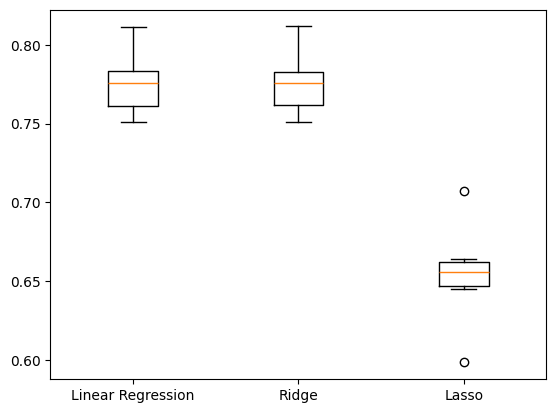

In [30]:
models = {"Linear Regression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1), 
          "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

 ___Lasso regression___ is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the ___RMSE___ can guide us on model selection

#### `Predicting on the test set`
In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (___RMSE___) as the metric. The dictionary __models__, containing the names and instances of the two _models_, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

In [31]:
scaller = StandardScaler()

X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

- Import __mean_squared_error__.
- _Fit_ the _model_ to the _scaled training features_ and the _training labels_.
- Make _predictions_ using the _scaled test features_.
- Calculate ___RMSE___ by passing the _test set labels_ and the _predicted labels_.

In [32]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():

  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)

  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.1114011650977189
Ridge Test Set RMSE: 0.11140405394479369
Lasso Test Set RMSE: 0.17329638628819166


The linear regression model just edges the best performance, although the difference is a __RMSE__ of ___0.00001___ for popularity! Now let's look at classification model selection.

#### `Visualizing classification model performance`
In this exercise, you will be solving a classification problem where the "__popularity__" column in the music_df dataset has been converted to binary values, with ___1___ representing __popularity__ more than or equal to the median for the "__popularity__" column, and ___0___ indicating __popularity__ below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, __KNeighborsClassifier__, __DecisionTreeClassifier__, and __LogisticRegression__ have been imported.

In [33]:
data_pop =  pd.read_csv('../datasets/music_clean.csv')
data_pop = data_pop.drop('Unnamed: 0', axis=1)

med_data_pop = data_pop['popularity'].median()
data_pop['popularity'] = (data_pop['popularity'] >= med_data_pop).astype(int)

X = data_pop.drop('popularity', axis=1).values
y = data_pop['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

- Create a dictionary of "__Logistic Regression__", "__KNN__", and "__Decision Tree Classifier__", setting the dictionary's values to a call of each __model__.
- Loop through the ___values___ in __models__.
- Instantiate a __KFold__ object to perform ___6___ _splits_, setting _shuffle_ to ___True___ and __random_state__ to ___12___.
- Perform __cross-validation__ using the _model_, the _scaled training features_, the _target training_ set, and setting __cv__ equal to __kf__.

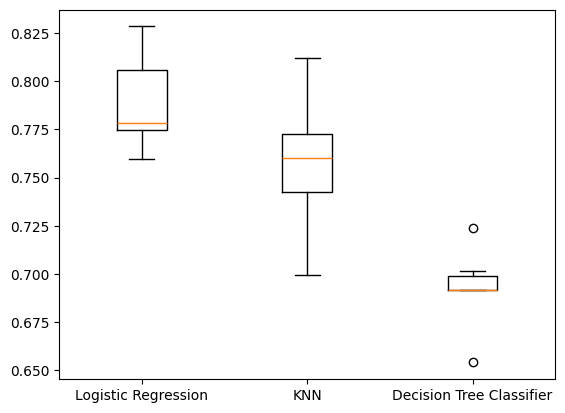

In [34]:
#  Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():

  #  Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline

#### `Pipeline for predicting song popularity`
For the final exercise, you will build a pipeline to _impute missing values_, _scale features_, and _perform hyperparameter tuning_ of a __logistic regression__ model. The aim is to find the best _parameters_ and _accuracy_ when predicting song __genre__!

All the models and objects required to build the pipeline have been preloaded for you.

In [35]:
music_df = pd.read_csv('../datasets/music_clean.csv')
music_df = music_df.drop('Unnamed: 0', axis=1)

X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

- Create the __steps__ for the _pipeline_ by calling a _simple imputer_, a _standard scaler_, and a _logistic regression_ model.
- Create a _pipeline_ object, and pass the _steps_ variable.
- Instantiate a _grid search_ object to perform __cross-validation__ using the __pipeline__ and the __parameters__.
- Print the __best parameters__ and compute and print the _test set_ __accuracy score__ for the _grid search_ object

In [36]:
# Create steps
steps = [("imp_mean", SimpleImputer()),
         ("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
          "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(
    tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.445, 'logreg__solver': 'newton-cg'}, Accuracy: 0.8


Excellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 80% accurate in predicting song genres!